<a href="https://colab.research.google.com/github/somkat16/DS-projects/blob/main/Runner_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import tensorflow as tf

In [ ]:
from google.colab import drive
df_track = pd.read_excel("/content/Track_Results.xlsx")

In [ ]:
df_track.head()

,"Name (Year,School)",Time (minutes),Event,Date,Time
0,"Appleton, Margot (SR,Virginia)",00:04:11,ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:11.00
1,"Appleton, Margot (SR,Virginia)",00:04:16.320000,ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:16.32
2,"Appleton, Margot (SR,Virginia)",00:04:05.680000,Raleigh Relays,"Mar 27-29, 2025",4:05.68
3,"Appleton, Margot (SR,Virginia)",00:04:28.310000,ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:28.31
4,"Appleton, Margot (SR,Virginia)",00:04:11.040000,ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:11.04


In [ ]:
del df_track['Time (minutes)']

In [ ]:
df_track.head()

,"Name (Year,School)",Event,Date,Time
0,"Appleton, Margot (SR,Virginia)",ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:11.00
1,"Appleton, Margot (SR,Virginia)",ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:16.32
2,"Appleton, Margot (SR,Virginia)",Raleigh Relays,"Mar 27-29, 2025",4:05.68
3,"Appleton, Margot (SR,Virginia)",ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:28.31
4,"Appleton, Margot (SR,Virginia)",ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:11.04


In [ ]:
df_track

,"Name (Year,School)",Event,Date,Time
0,"Appleton, Margot (SR,Virginia)",ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:11.00
1,"Appleton, Margot (SR,Virginia)",ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:16.32
2,"Appleton, Margot (SR,Virginia)",Raleigh Relays,"Mar 27-29, 2025",4:05.68
3,"Appleton, Margot (SR,Virginia)",ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:28.31
4,"Appleton, Margot (SR,Virginia)",ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:11.04
...,...,...,...,...
282,"Parks, Taryn (SR,North Carolina)",ACC Outdoor Track & Field Championships,"May 13-15, 2021",4:24.53
283,"Parks, Taryn (SR,North Carolina)",Duke Twilight,2021-05-03 00:00:00,4:22.04
284,"Parks, Taryn (SR,North Carolina)",Virginia Challenge,"Apr 16-17, 2021",4:29.13
285,"Parks, Taryn (SR,North Carolina)",Eagle Elite Invitational,2025-02-14 00:00:00,DNF


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



converting time to seconds, because the time format is in a string which models can't use to regress or compared on. It has to be converted to a float in order for the models to use the numbers/times.

In [ ]:
def conversion_time(time_str):
    try:
        minutes, seconds = map(float, time_str.split(':'))
        return minutes * 60 + seconds
    except:
        return np.nan

df_track['Time_seconds'] = df_track['Time'].astype(str).apply(conversion_time)
df_clean = df_track.dropna(subset=['Time_seconds'])


In [ ]:
df_track

,"Name (Year,School)",Event,Date,Time,Time_seconds
0,"Appleton, Margot (SR,Virginia)",ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:11.00,251.00
1,"Appleton, Margot (SR,Virginia)",ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:16.32,256.32
2,"Appleton, Margot (SR,Virginia)",Raleigh Relays,"Mar 27-29, 2025",4:05.68,245.68
3,"Appleton, Margot (SR,Virginia)",ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:28.31,268.31
4,"Appleton, Margot (SR,Virginia)",ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:11.04,251.04
...,...,...,...,...,...
282,"Parks, Taryn (SR,North Carolina)",ACC Outdoor Track & Field Championships,"May 13-15, 2021",4:24.53,264.53
283,"Parks, Taryn (SR,North Carolina)",Duke Twilight,2021-05-03 00:00:00,4:22.04,262.04
284,"Parks, Taryn (SR,North Carolina)",Virginia Challenge,"Apr 16-17, 2021",4:29.13,269.13
285,"Parks, Taryn (SR,North Carolina)",Eagle Elite Invitational,2025-02-14 00:00:00,DNF,NaN


showing the progression of each runner from their times.


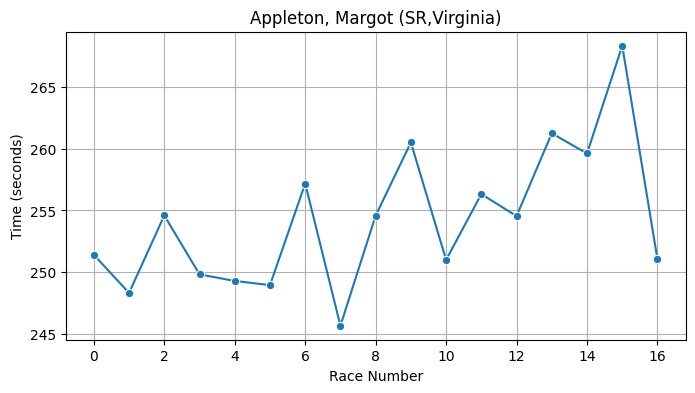

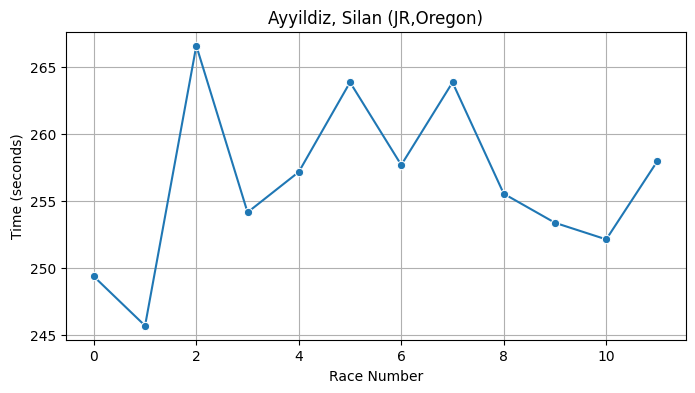

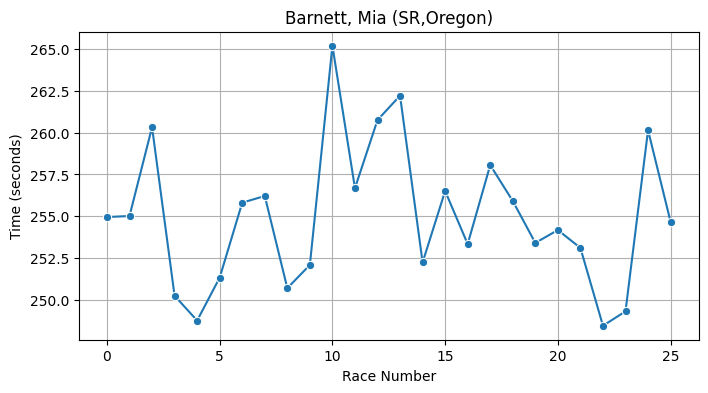

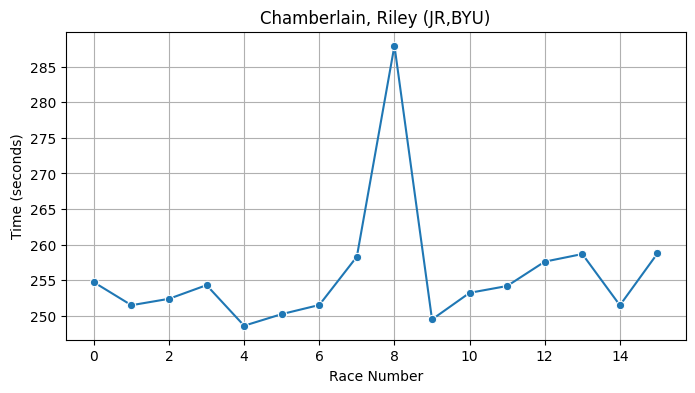

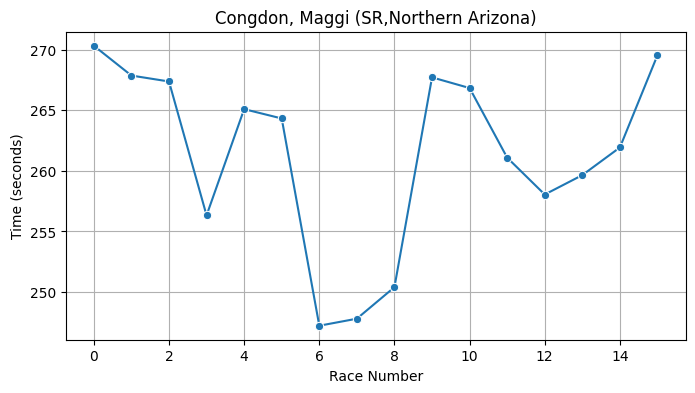

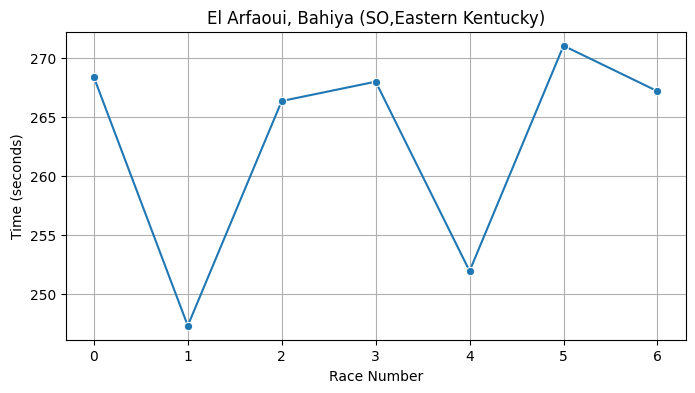

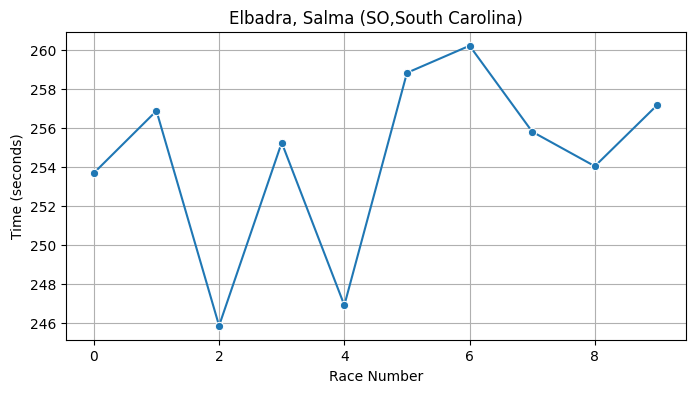

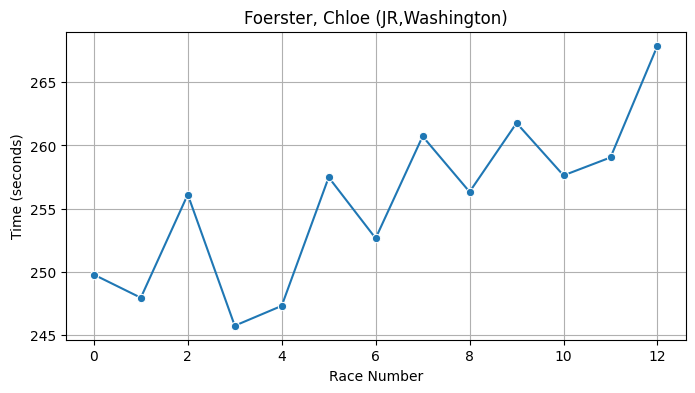

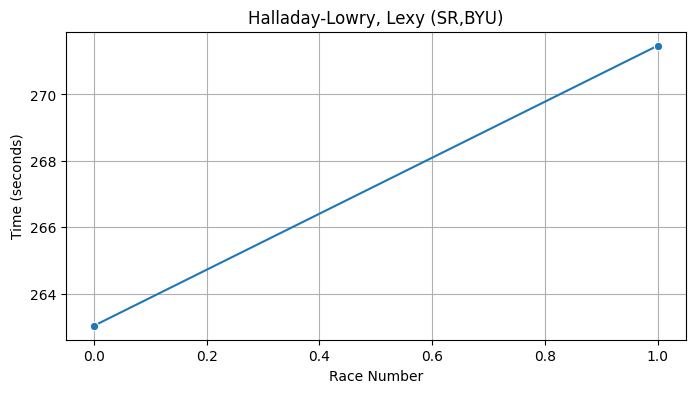

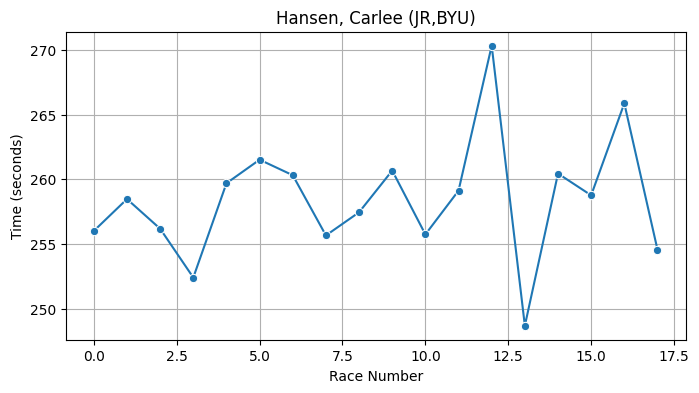

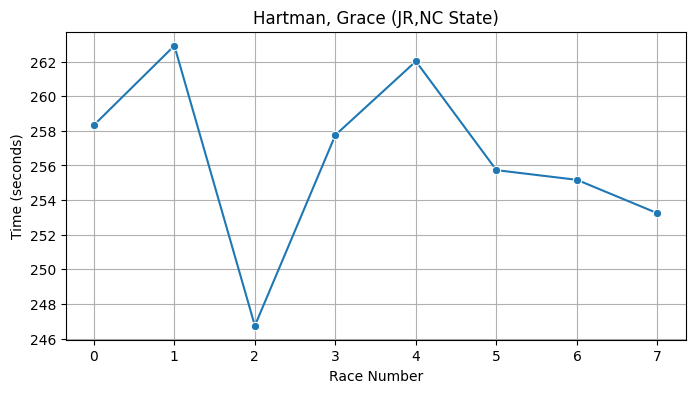

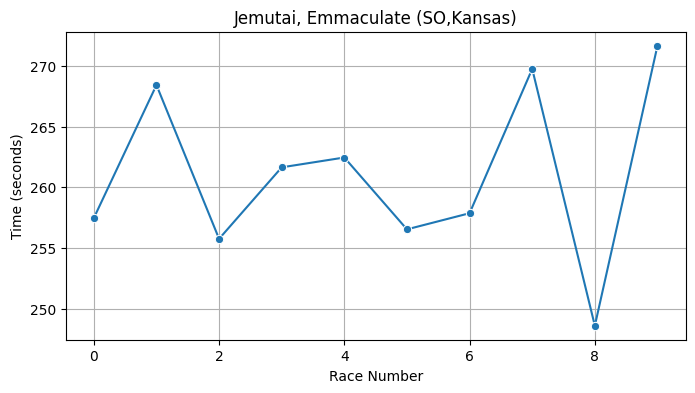

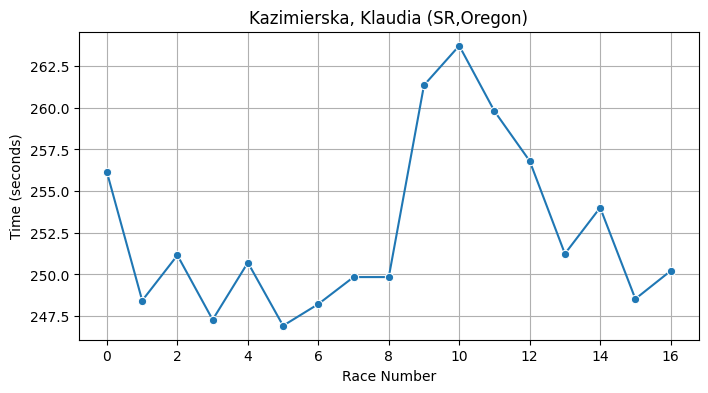

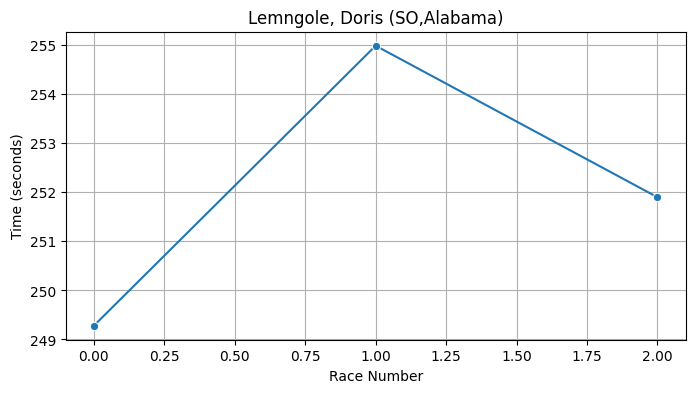

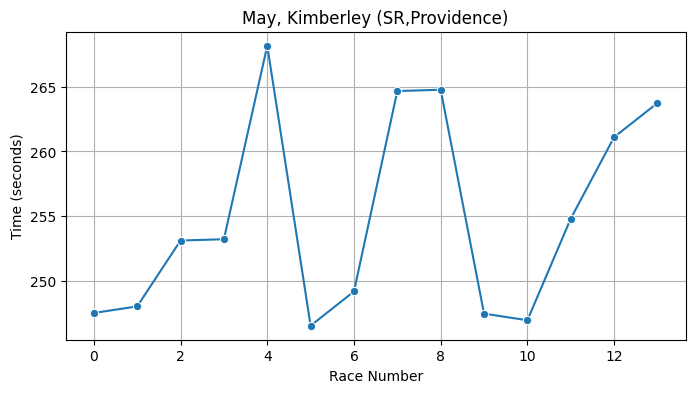

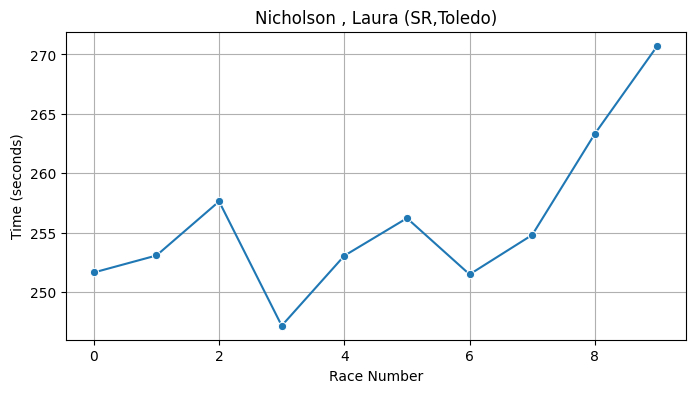

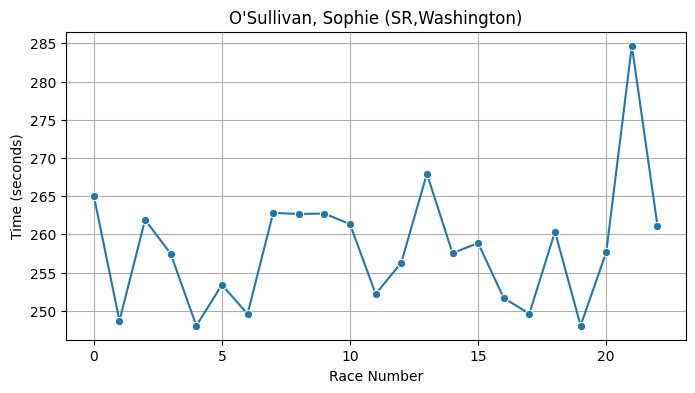

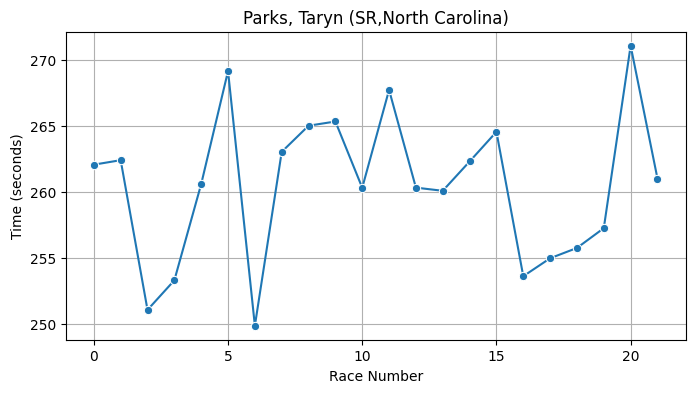

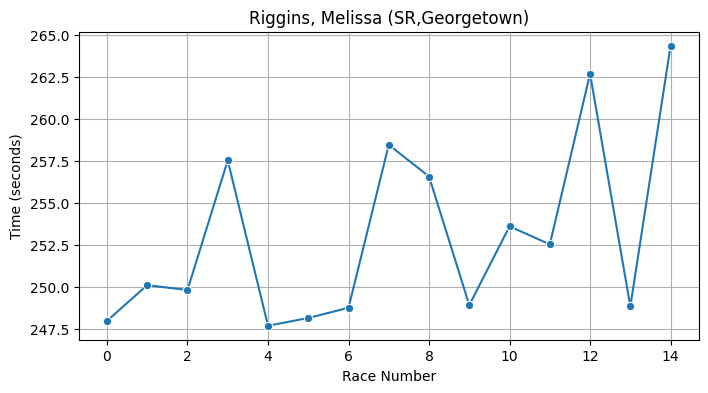

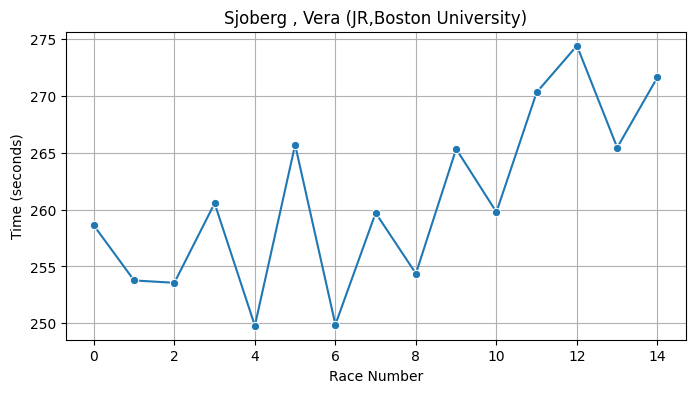

In [ ]:
import seaborn as sns

# Rename column
df_clean = df_clean.rename(columns={'Name (Year,School)': 'Runner'})

# Create Race_Number column
df_clean = df_clean.sort_values(by=['Runner', 'Date'])
df_clean['Race_Number'] = df_clean.groupby('Runner').cumcount()

unique_runners = df_clean['Runner'].unique()

for runner in unique_runners:
    runner_data = df_clean[df_clean['Runner'] == runner]
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=runner_data, x='Race_Number', y='Time_seconds', marker='o')
    plt.title(f"{runner}")
    plt.xlabel("Race Number")
    plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.show()

Fastest time of each runner in order from fastest to slowest

In [25]:
fastest_times = (
    df_clean.groupby('Runner')
    .agg({'Time_seconds': 'min'})
    .reset_index()
)

# Sorting from fastest to slowest
fastest_times_sorted = (
    fastest_times.sort_values(by='Time_seconds', ascending=True)
    .reset_index(drop=True)
)

# Convert seconds to MM:SS.00 format
fastest_times_sorted['Fastest_Time'] = fastest_times_sorted['Time_seconds'].apply(
    lambda x: f"{int(x//60)}:{x%60:05.2f}"
)

# Display
print(fastest_times_sorted[['Runner', 'Fastest_Time']])

                                      Runner Fastest_Time
0                Ayyildiz, Silan (JR,Oregon)      4:05.66
1             Appleton, Margot (SR,Virginia)      4:05.68
2            Foerster, Chloe (JR,Washington)      4:05.75
3         Elbadra, Salma (SO,South Carolina)      4:05.85
4             May, Kimberley (SR,Providence)      4:06.58
5               Hartman, Grace (JR,NC State)      4:06.74
6           Kazimierska, Klaudia (SR,Oregon)      4:06.92
7              Nicholson , Laura (SR,Toledo)      4:07.17
8       Congdon, Maggi (SR,Northern Arizona)      4:07.23
9   El Arfaoui, Bahiya (SO,Eastern Kentucky)      4:07.31
10          Riggins, Melissa (SR,Georgetown)      4:07.67
11        O'Sullivan, Sophie (SR,Washington)      4:08.04
12                  Barnett, Mia (SR,Oregon)      4:08.44
13           Jemutai, Emmaculate (SO,Kansas)      4:08.60
14               Chamberlain, Riley (JR,BYU)      4:08.61
15                   Hansen, Carlee (JR,BYU)      4:08.70
16            

##Linear regression model
predicting runner times based off their previous race times.


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_clean['Runner_ID'] = label_encoder.fit_transform(df_clean['Runner'])

df_clean = df_clean.sort_values(by=['Runner', 'Date'])
df_clean['Race_Number'] = df_clean.groupby('Runner').cumcount()

In [28]:
X = df_clean[['Runner_ID', 'Race_Number']]
y = df_clean['Time_seconds']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
latest_races = df_clean.groupby('Runner').agg({'Race_Number': 'max', 'Runner_ID': 'first'}).reset_index()
latest_races['Next_Race_Number'] = latest_races['Race_Number'] + 1

X_next = latest_races[['Runner_ID', 'Next_Race_Number']].rename(columns={'Next_Race_Number': 'Race_Number'})
latest_races['Predicted_Time_Seconds'] = model.predict(X_next)

# Convert to MM:SS.ss format
latest_races['Predicted_Times'] = latest_races['Predicted_Time_Seconds'].apply(
    lambda x: f"{int(x//60)}:{x%60:05.2f}"
)

# Show results
latest_races[['Runner', 'Predicted_Times']]



,Runner,Predicted_Times
0,"Appleton, Margot (SR,Virginia)",4:17.51
1,"Ayyildiz, Silan (JR,Oregon)",4:16.37
2,"Barnett, Mia (SR,Oregon)",4:20.11
3,"Chamberlain, Riley (JR,BYU)",4:17.67
4,"Congdon, Maggi (SR,Northern Arizona)",4:17.81
5,"El Arfaoui, Bahiya (SO,Eastern Kentucky)",4:15.64
6,"Elbadra, Salma (SO,South Carolina)",4:16.55
7,"Foerster, Chloe (JR,Washington)",4:17.46
8,"Halladay-Lowry, Lexy (SR,BYU)",4:14.77
9,"Hansen, Carlee (JR,BYU)",4:19.03


In [30]:
# Convert MM:SS.ss format to total seconds
def mmss_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split(':'))
    return minutes * 60 + seconds

# Create a new column with total seconds
latest_races['Predicted_Time_Seconds'] = latest_races['Predicted_Times'].apply(mmss_to_seconds)

# Sort from fastest to slowest
sorted_predictions = latest_races.sort_values(by='Predicted_Time_Seconds').reset_index(drop=True)

sorted_predictions

,Runner,Race_Number,Runner_ID,Next_Race_Number,Predicted_Time_Seconds,Predicted_Times
0,"Halladay-Lowry, Lexy (SR,BYU)",1,8,2,254.77,4:14.77
1,"El Arfaoui, Bahiya (SO,Eastern Kentucky)",6,5,7,255.64,4:15.64
2,"Lemngole, Doris (SO,Alabama)",2,13,3,255.73,4:15.73
3,"Ayyildiz, Silan (JR,Oregon)",11,1,12,256.37,4:16.37
4,"Elbadra, Salma (SO,South Carolina)",9,6,10,256.55,4:16.55
5,"Hartman, Grace (JR,NC State)",7,10,8,256.59,4:16.59
6,"Jemutai, Emmaculate (SO,Kansas)",9,11,10,257.25,4:17.25
7,"Foerster, Chloe (JR,Washington)",12,7,13,257.46,4:17.46
8,"Appleton, Margot (SR,Virginia)",16,0,17,257.51,4:17.51
9,"Chamberlain, Riley (JR,BYU)",15,3,16,257.67,4:17.67


In [31]:
del sorted_predictions['Predicted_Time_Seconds']

In [32]:
sorted_predictions

,Runner,Race_Number,Runner_ID,Next_Race_Number,Predicted_Times
0,"Halladay-Lowry, Lexy (SR,BYU)",1,8,2,4:14.77
1,"El Arfaoui, Bahiya (SO,Eastern Kentucky)",6,5,7,4:15.64
2,"Lemngole, Doris (SO,Alabama)",2,13,3,4:15.73
3,"Ayyildiz, Silan (JR,Oregon)",11,1,12,4:16.37
4,"Elbadra, Salma (SO,South Carolina)",9,6,10,4:16.55
5,"Hartman, Grace (JR,NC State)",7,10,8,4:16.59
6,"Jemutai, Emmaculate (SO,Kansas)",9,11,10,4:17.25
7,"Foerster, Chloe (JR,Washington)",12,7,13,4:17.46
8,"Appleton, Margot (SR,Virginia)",16,0,17,4:17.51
9,"Chamberlain, Riley (JR,BYU)",15,3,16,4:17.67


## Random forest regression model


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
X = df_clean[['Runner_ID', 'Race_Number']]
y = df_clean['Time_seconds']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_tf=RandomForestRegressor(n_estimators=20,random_state=1)
model_tf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=1)

In [35]:
# Get latest race info per runner
latest_races = df_clean.groupby('Runner').agg({
    'Race_Number': 'max',
    'Runner_ID': 'first'
}).reset_index()

# Predict next race (Race_Number + 1)
latest_races['Next_Race_Number'] = latest_races['Race_Number'] + 1

# Prepare prediction input
X_next = latest_races[['Runner_ID', 'Next_Race_Number']].rename(columns={'Next_Race_Number': 'Race_Number'})

# Predict
latest_races['Predicted_Time_Seconds'] = model_tf.predict(X_next)

# Convert to MM:SS.ss
latest_races['Predicted_Time_MMSS'] = latest_races['Predicted_Time_Seconds'].apply(
    lambda x: f"{int(x//60)}:{x%60:05.2f}"
)

# Display predictions
print(latest_races[['Runner', 'Predicted_Time_MMSS']])


                                      Runner Predicted_Time_MMSS
0             Appleton, Margot (SR,Virginia)             4:13.11
1                Ayyildiz, Silan (JR,Oregon)             4:16.90
2                   Barnett, Mia (SR,Oregon)             4:15.45
3                Chamberlain, Riley (JR,BYU)             4:16.52
4       Congdon, Maggi (SR,Northern Arizona)             4:19.98
5   El Arfaoui, Bahiya (SO,Eastern Kentucky)             4:20.24
6         Elbadra, Salma (SO,South Carolina)             4:19.42
7            Foerster, Chloe (JR,Washington)             4:25.41
8              Halladay-Lowry, Lexy (SR,BYU)             4:11.37
9                    Hansen, Carlee (JR,BYU)             4:19.74
10              Hartman, Grace (JR,NC State)             4:15.18
11           Jemutai, Emmaculate (SO,Kansas)             4:23.40
12          Kazimierska, Klaudia (SR,Oregon)             4:10.35
13              Lemngole, Doris (SO,Alabama)             4:11.83
14            May, Kimber

Mean absolute percentage error

In [42]:
from sklearn.metrics import mean_absolute_error

# Linear Regression
mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

# Random Forest
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)


print("Linear Regression:")
print(f"  MAE: {mae_lr:.2f} seconds")


print("\nRandom Forest Regressor:")
print(f"  MAE: {mae_rf:.2f} seconds")



Linear Regression:
  MAE: 5.47 seconds

Random Forest Regressor:
  MAE: 5.68 seconds


In [46]:
import numpy as np

# Linear Regression
mape_lr = np.mean(np.abs((y_test - y_test_pred_lr) / y_test)) * 100

# Random Forest
mape_rf = np.mean(np.abs((y_test - y_test_pred_rf) / y_test)) * 100

print("Linear Regression:")
print(f"  MAE: {mae_lr:.2f} seconds")
print(f"  MAPE: {mape_lr:.2f}%")

print("\nRandom Forest Regressor:")
print(f"  MAE: {mae_rf:.2f} seconds")
print(f"  MAPE: {mape_rf:.2f}%")

Linear Regression:
  MAE: 5.47 seconds
  MAPE: 2.10%

Random Forest Regressor:
  MAE: 5.68 seconds
  MAPE: 2.18%


The Mean Absolute Percentage Error shows that the Linear Regression model is more accurate for predicting runner's times. 5.47 seconds off from the actual value.